In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/allenkong221/netflix-titles-dataset/main/netflix_titles.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.shape

(6234, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [8]:
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')

In [9]:
df.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
director,1969
cast,570
country,476
date_added,11
rating,10
title,0
show_id,0
type,0
release_year,0
duration,0


In [11]:
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')
df['year_added']=df['date_added'].dt.year
df = df.drop('year_added', axis=1, errors='ignore')
df['country'] = df['country'].fillna('Unknown')

In [12]:
df['listed_in'] = df['listed_in'].str.strip()

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
movies_vs_shows=df.groupby('release_year')['type'].sum()

In [15]:
movies_vs_shows

,type
release_year,
1925,TV Show
1942,MovieMovie
1943,MovieMovieMovie
1944,MovieMovieMovie
1945,MovieMovieMovie
...,...
2016,MovieTV ShowTV ShowMovieMovieMovieMovieTV Show...
2017,MovieMovieTV ShowMovieMovieMovieMovieTV ShowTV...
2018,MovieTV ShowMovieMovieMovieMovieMovieMovieTV S...


In [16]:
df['year_added']=df['date_added'].dt.year

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [18]:
df=df.drop('release_year',errors='ignore')

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [20]:
df['year_added'].isnull().sum()

np.int64(11)

In [21]:
df_trend=df.dropna(subset=['year_added'])

In [22]:
df_trend.isnull().sum()

,0
show_id,0
type,0
title,0
director,1958
cast,569
country,0
date_added,0
release_year,0
rating,9
duration,0


In [23]:
movies_vs_shows=df_trend.groupby(['year_added', 'type']).size().unstack(fill_value=0).sort_index()

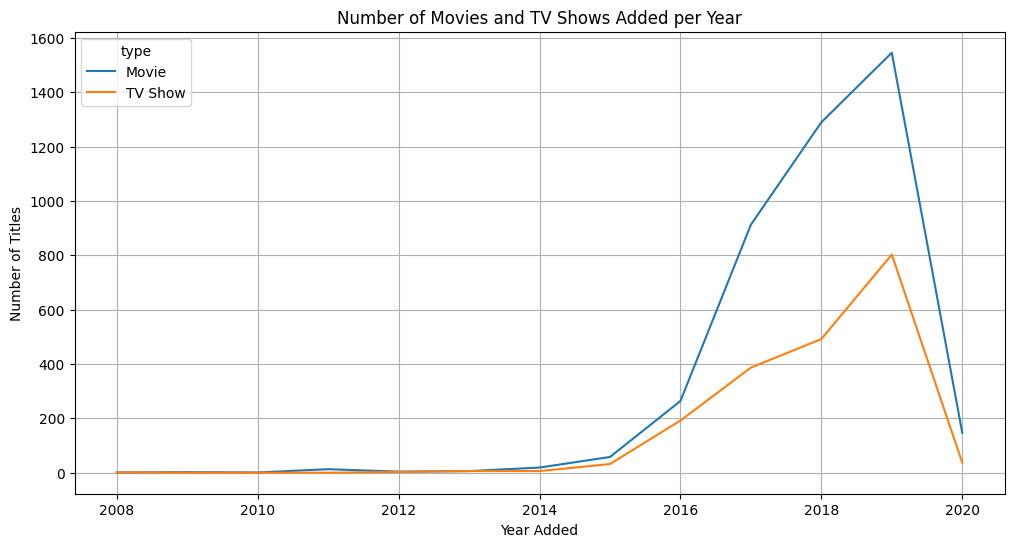

In [24]:
movies_vs_shows.plot(kind='line', figsize=(12,6),
                     title='Number of Movies and TV Shows Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [25]:
content_growth = (df_trend.groupby('year_added').size().sort_index().reset_index(name='total_titles'))

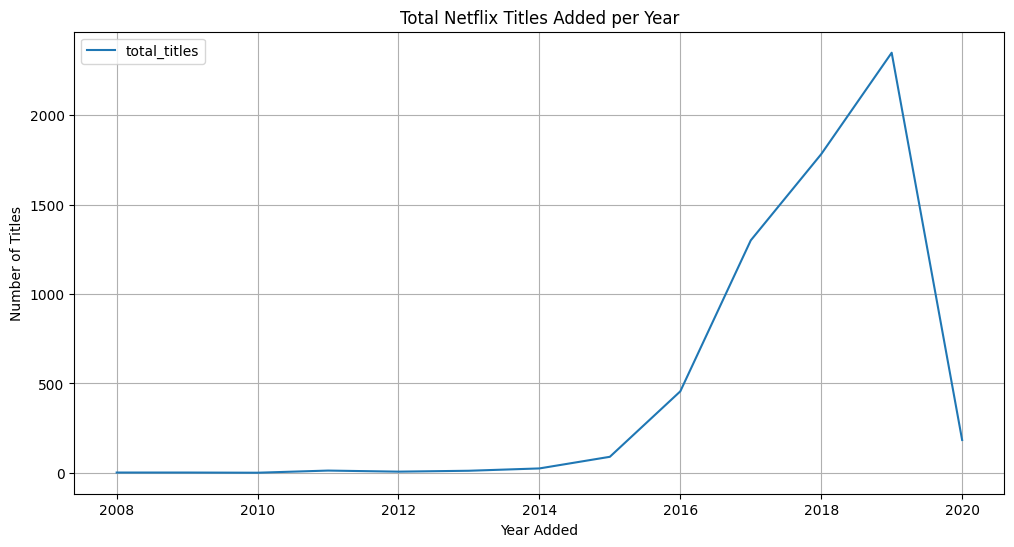

In [26]:
content_growth.plot(x='year_added',y='total_titles',kind='line',figsize=(12,6),title='Total Netflix Titles Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [27]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0


In [28]:
genres= df_trend['listed_in'].str.split(',').explode().str.strip()

In [29]:
genres_count=genres.value_counts()

In [30]:
top_10_genres=genres_count.head(10)

In [31]:
top_10_genres

,count
listed_in,
International Movies,1927
Dramas,1623
Comedies,1113
International TV Shows,1000
Documentaries,668
TV Dramas,598
Action & Adventure,597
Independent Movies,552
TV Comedies,429


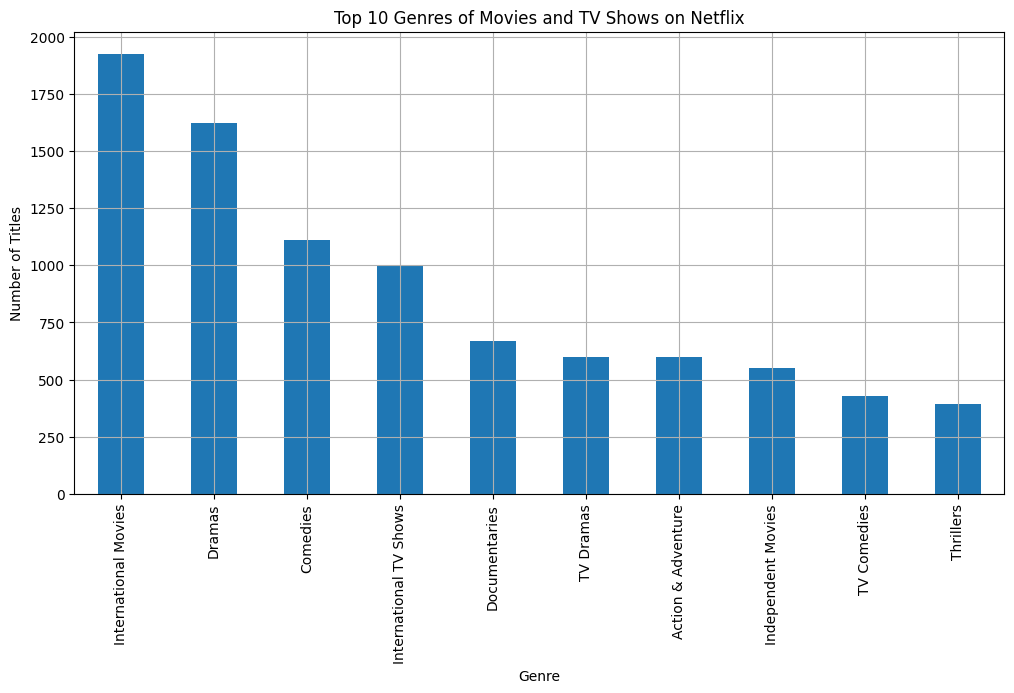

In [32]:
top_10_genres.plot(kind='bar',figsize=(12,6),title='Top 10 Genres of Movies and TV Shows on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [33]:
top_3 = genres_count.head(3)

In [34]:
total_genre_count = genres_count.sum()

In [35]:
percentage_share = (top_3.sum() / total_genre_count) * 100

In [36]:
percentage_share

np.float64(34.163674994505094)

In [37]:
df_country = df.dropna(subset=['country'])

In [38]:
df_country['country'] = df_country['country'].str.split(',')

In [39]:
df_country['country'] = df_country['country'].apply(
    lambda x: [c.strip() for c in x])

In [40]:
df_country = df_country.explode('country')

In [41]:
country_count = (df_country['country'].value_counts().reset_index())

In [42]:
country_count.columns = ['country', 'title_count']

In [43]:
country_count.head(10)

,country,title_count
0,United States,2610
1,India,838
2,United Kingdom,602
3,Unknown,476
4,Canada,318
5,France,271
6,Japan,231
7,Spain,178
8,South Korea,162
9,Germany,151


In [44]:
country_count.drop(3,inplace=True)

In [45]:
country_count.head(10)

,country,title_count
0,United States,2610
1,India,838
2,United Kingdom,602
4,Canada,318
5,France,271
6,Japan,231
7,Spain,178
8,South Korea,162
9,Germany,151
10,Mexico,129


In [46]:
country_count = country_count.reset_index(drop=True)

In [47]:
country_count.head(10)

,country,title_count
0,United States,2610
1,India,838
2,United Kingdom,602
3,Canada,318
4,France,271
5,Japan,231
6,Spain,178
7,South Korea,162
8,Germany,151
9,Mexico,129


In [48]:
df_clean = country_count.copy()

In [49]:
total_titles = df_clean['title_count'].sum()

In [50]:
df_country_clean = df_country[df_country['country'] != 'Unknown'].copy()

In [51]:
us_titles = df_country_clean[df_country_clean['country'] == 'United States']['title'].nunique()

In [52]:
non_us_titles = total_titles - us_titles

In [53]:
us_percent = round((us_titles / total_titles) * 100, 2)
non_us_percent = round(100 - us_percent, 2)

In [54]:
us_percent, non_us_percent

(np.float64(36.17), np.float64(63.83))

In [55]:
df_powerbi = df.copy()

In [56]:
df_powerbi = df_powerbi[df_powerbi['country'].notna()]
df_powerbi = df_powerbi[df_powerbi['country'] != 'Unknown']

In [57]:
df_powerbi = df_powerbi[[
    'title',
    'type',
    'country',
    'listed_in',
    'year_added'
]]

In [58]:
df_powerbi = df_powerbi.drop_duplicates(subset='title')

In [59]:
df_powerbi.to_csv("netflix_powerbi_clean.csv", index=False)

In [60]:
country_count.to_csv('country_count',index=False)

In [61]:
genres = (
    df[['title', 'listed_in']]
    .assign(genre=df['listed_in'].str.split(','))
    .explode('genre')
)

genres['genre'] = genres['genre'].str.strip()

genre_unique_titles = (
    genres.groupby('genre')['title']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

genre_unique_titles


,title
genre,
International Movies,1919
Dramas,1614
Comedies,1112
International TV Shows,992
Documentaries,667
TV Dramas,596
Action & Adventure,593
Independent Movies,551
TV Comedies,435
